In [1]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# load metadata
metadata = pd.read_csv("./information.csv")

metadata.head()

,Unnamed: 0,fname,directory,model,label
0,0,2022-05-14_06-18-26.wav,./dataset/big_fast/,X8SW,1
1,1,2022-05-14_06-18-36.wav,./dataset/big_fast/,X8SW,1
2,2,2022-05-14_06-18-47.wav,./dataset/big_fast/,X8SW,1
3,3,2022-05-14_06-18-58.wav,./dataset/big_fast/,X8SW,1
4,4,2022-05-14_06-19-08.wav,./dataset/big_fast/,X8SW,1


In [3]:
# function of feature extraction MFCCs
def feature_extractor(file):
    y, sr = librosa.load(file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_scaled = np.mean(mfccs.T, axis=0)

    return mfcc_scaled

In [4]:
# load all of dataset
preprocessed = []
for i in metadata.iterrows():
    file_name = os.path.join(i[1]["directory"]+i[1]["fname"])
    label = i[1]["label"]
    mfccs = feature_extractor(file_name)
    preprocessed.append([mfccs, label])

In [5]:
# make DataFrame
extracted_features_df=pd.DataFrame(preprocessed,columns=['feature','class'])
extracted_features_df=pd.DataFrame(extracted_features_df['feature'].values.tolist()).add_prefix('feature').join(extracted_features_df)
extracted_features_df=extracted_features_df.drop('feature', axis=1)
extracted_features_df.head(10)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,class
0,-34.757702,-3.581780,19.382706,-8.077194,-21.287191,22.475166,-15.629531,12.752374,-18.148090,7.955712,...,-5.444711,-0.792921,-2.739799,-5.869696,-0.855692,-5.899864,-0.735184,-1.888514,-0.338176,1
1,-43.568111,-11.322458,21.469357,-7.754216,-22.027498,21.914412,-15.751432,12.869370,-18.090042,7.182421,...,-4.681927,-1.177128,-2.972403,-6.740635,-1.925660,-6.501649,-1.578188,-4.005564,-1.870544,1
2,-34.163696,-9.558475,16.611864,-7.482998,-24.068537,20.387890,-15.865508,12.385125,-18.249800,6.328336,...,-7.217370,-2.388330,-4.906383,-8.551996,-2.267916,-7.809778,-1.488659,-4.490270,-1.627527,1
3,-41.636829,-14.065631,17.482401,-7.506053,-24.763744,21.193975,-16.953238,11.749160,-19.069742,6.420603,...,-7.849826,-3.055280,-5.202926,-8.939364,-2.623534,-8.013994,-2.473048,-5.419264,-1.427589,1
4,-41.603691,-15.567451,16.096767,-9.244473,-25.211946,19.199183,-17.980633,10.575136,-20.110603,4.703289,...,-9.570666,-3.836569,-5.216599,-9.064144,-3.100473,-8.249212,-3.605293,-5.423552,-1.361753,1
5,-43.025612,-14.212462,19.030100,-6.655330,-24.235172,22.163107,-15.604161,12.616926,-18.326008,6.293110,...,-7.415926,-2.384385,-3.932047,-7.369976,-1.834309,-7.285221,-2.018561,-3.903082,-1.248820,1
6,-55.978012,-8.717694,17.843155,-7.753464,-24.852478,20.961866,-17.008350,10.425065,-17.987074,5.465547,...,-7.335856,-3.033402,-4.377726,-8.244246,-1.954695,-7.588147,-1.715449,-5.622667,-1.305777,1
7,-38.889595,-13.516362,16.024361,-7.669434,-24.886395,20.559284,-17.212036,12.740314,-19.824028,5.307132,...,-8.645687,-3.922640,-5.262270,-8.579312,-2.803349,-7.338463,-2.889835,-4.776567,-0.581235,1
8,-37.679756,-9.525244,15.766765,-10.942462,-25.391369,20.063307,-16.887768,11.495661,-19.006466,5.917158,...,-6.919549,-2.607425,-3.718511,-8.288989,-1.897957,-7.243641,-0.910902,-3.512100,-1.505296,1
9,-42.978638,-12.593167,17.520155,-7.353724,-23.016609,21.662954,-16.695066,12.811034,-17.709755,6.234817,...,-7.632322,-2.094846,-4.630273,-8.366478,-1.664587,-7.057859,-1.557211,-4.679026,-0.319745,1


## Training models

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC

In [7]:
# split train data and test data
data_x = extracted_features_df.drop(['class'], axis=1)
data_y = extracted_features_df['class']

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [8]:
X_train

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19
38,-37.856377,-2.430756,21.807016,-7.041980,-20.644346,23.046646,-13.074459,17.362831,-17.798115,10.608903,-4.147986,-6.049020,-1.427366,-3.885896,-7.629303,-0.480068,-6.080707,-3.687133,-4.847228,-0.519253
143,-46.525772,-11.536917,23.822557,-1.416677,-20.630928,19.784143,-12.992973,14.606000,-17.514269,9.534716,-3.388549,-5.773589,3.150280,0.864368,-4.473627,0.421876,-5.919295,-2.022278,-5.207302,-0.712715
84,-37.555668,-12.164818,22.568573,-3.031837,-23.042856,19.643896,-16.058496,15.089878,-19.752792,8.225067,-5.205068,-6.457930,0.154973,-0.913920,-6.585655,-0.944607,-5.798975,-1.767732,-6.016663,-1.748905
55,-47.923519,-6.593538,19.564108,-8.071058,-22.740950,22.153334,-14.514164,15.131838,-19.336321,6.422537,-3.875611,-8.343973,-0.859354,-4.697989,-9.135228,-1.605672,-6.070389,-4.381493,-4.411547,0.003944
218,-40.713089,-25.369417,14.650334,-1.451569,-15.373278,18.883062,-5.674728,21.703655,-11.169192,12.434107,0.609576,-10.184185,9.502527,0.493075,1.504883,2.339692,-3.355839,-6.709279,-0.883396,4.612380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-51.403969,-10.436350,24.947836,-4.002015,-20.897682,20.811298,-11.912220,13.662478,-16.154852,8.479630,-2.253000,-5.077217,3.421612,2.073555,-4.809398,1.639700,-4.727574,-0.113378,-1.535869,0.265537
14,-55.405315,-6.198168,16.665688,-7.826603,-17.201654,23.114990,-13.701257,17.793459,-19.755438,11.741822,-5.846417,-8.410740,-0.556081,-7.091679,-4.923234,-0.805241,-2.501265,-2.522521,-0.837426,0.507683
92,-54.308876,-13.213922,25.030083,-4.915241,-23.752579,20.670979,-13.843057,14.256762,-17.373140,9.656485,-4.650026,-3.048851,3.313790,2.949187,-4.883258,1.422846,-4.522874,0.472421,-3.069145,0.255532
179,-57.186337,-25.312967,23.575878,0.385334,-21.720100,25.011055,-8.207890,17.827843,-14.116022,7.365312,-0.901481,-7.588921,7.887777,-0.400561,-1.462106,0.439304,-3.051181,-5.300472,-3.608672,4.269797


## SVM classifier

In [35]:
svc = SVC(kernel='linear')

Text(0.5, 1.0, 'SVM')

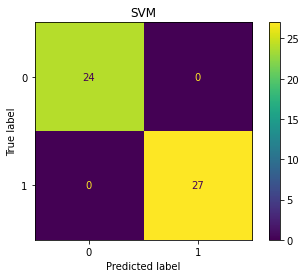

In [36]:
svc.fit(X_train, y_train)
pred_y = svc.predict(X_test)

plot = plot_confusion_matrix(svc, X_test, pred_y)
plot.ax_.set_title("SVM")

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier()

Text(0.5, 1.0, 'Random Forest')

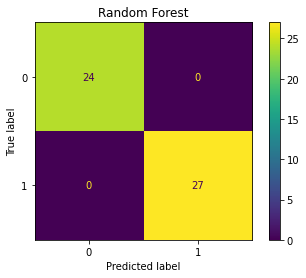

In [39]:
pred_y = randomforest.predict(X_test)

plot = plot_confusion_matrix(svc, X_test, pred_y)
plot.ax_.set_title("Random Forest")

## LGBM

In [40]:
from lightgbm import LGBMClassifier

In [41]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

Text(0.5, 1.0, 'LGBM')

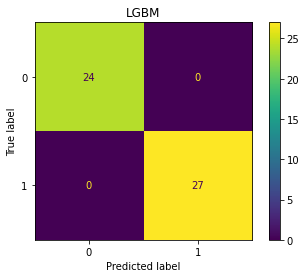

In [42]:
pred_y = lgbm.predict(X_test)

plot = plot_confusion_matrix(svc, X_test, pred_y)
plot.ax_.set_title("LGBM")